In [0]:
# CNN-Mini-Project

In [2]:
# Load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from PIL import Image

Using TensorFlow backend.


Load the dataset
We decide to use CIFAR-10 Dataset. Fortunately, this dataset is included in Keras. datasets

In [3]:
# Split train and test dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 240s 1us/step


Description of data

In [4]:
print('The shape of training images is:', x_train.shape)
print('Number of our training images is:', len(x_train))
print('The shape of training labels is:', y_train.shape)
print('Number of our training labels is:', len(y_train))
print('The shape of testing images is:', x_test.shape)
print('Number of our testing images is:', len(x_test))
print('The shape of testing labels is:', y_test.shape)
print('Number of our testing labels is:', len(y_test))

print('The datatype of training images is:', x_train.dtype)
print('The datatype of training labels is:', y_train.dtype)
print('The datatype of testing images is:', x_test.dtype)
print('The datatype of testing labels is:', y_test.dtype)

The shape of training images is: (50000, 32, 32, 3)
Number of our training images is: 50000
The shape of training labels is: (50000, 1)
Number of our training labels is: 50000
The shape of testing images is: (10000, 32, 32, 3)
Number of our testing images is: 10000
The shape of testing labels is: (10000, 1)
Number of our testing labels is: 10000
The datatype of training images is: uint8
The datatype of training labels is: uint8
The datatype of testing images is: uint8
The datatype of testing labels is: int64


EDA

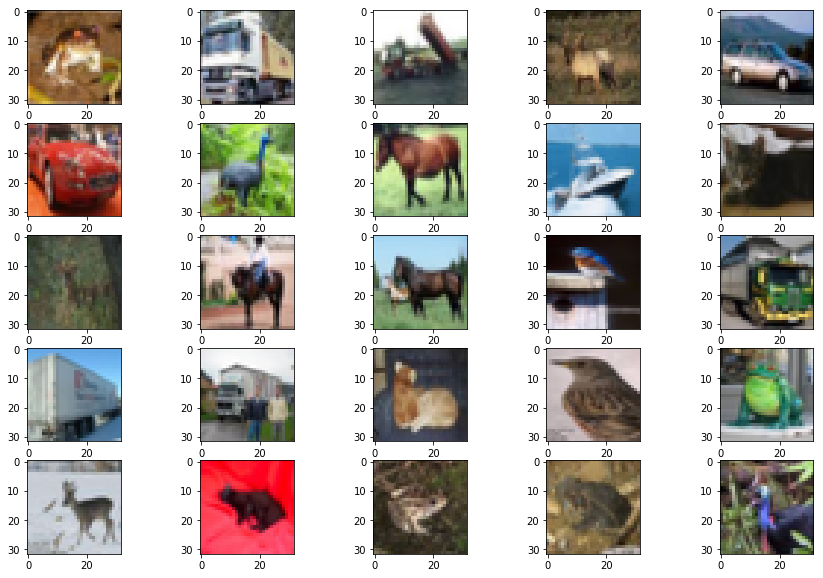

In [5]:
# visualize 25 figures in the training dataset
fig, sub = plt.subplots(nrows=5, ncols=5, figsize=(15, 10))

for i in range(5):
    for j in range(5):
        p = sub[i, j]
        array = x_train[i*5 + j]
        p.imshow(array)

The distribution of the category of these figures

In [6]:
# How all these categories are distributed?
# train dataset, 10 categories, each has 5000 images
# test dataset, 10 categories, each has 5000 images
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))
# It is quite obvious that all these categories are evenly distributed

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


Data Preprocess
For training iamges and testing images, we perform:

(1) change the datatype into float 32

(2) scale pixel values into the range of [0,1] to reduce the pressure of gradient part

For traing labels and testing labels, we change the int label to matrix with one-hot encoding.

In [0]:
from keras.utils.np_utils import to_categorical
# data preprocessing: change the datatype
# scale to [0,1] for pixel values to reduce the pressure of gradient part
x_train = x_train.astype('float32')
x_train /= 255.0
x_test = x_test.astype('float32')
x_test /= 255.0


In [8]:
nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Models:
The first model:

A basic CNN model based on VGG16 (choose part of VGG16, several layers, and modify the model for our dataset)

epoch = 100

batch_size = 64

weight_decay = 0.0005

kernel_initializer='he_normal'

optimizers = RMSprop with (learning rate = 2e-5)

loss='categorical_crossentropy'

In [0]:
# Build our network
# A basic CNN model
# This is our baseline model, (modify several front layers of VGG16 to train a small model)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Input, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
import keras.backend as K
from keras import losses
batch_size = 64
nb_classes = 10
epochs = 200

In [10]:
# input image dimensions
img_rows, img_cols = 32, 32
channels = 3
weight_decay = 0.0005
x = Input(shape=(img_rows, img_cols, channels))
y = x
y = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)

y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(units=nb_classes, activation='softmax', kernel_initializer='he_normal')(y)

model1 = Model(inputs=x, outputs=y, name='model1')

model1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model1.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x7fb1e68fae10>>

In [12]:
# fit the first model on our dataset
history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=500,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 209us/step - loss: 2.2786 - acc: 0.1500 - val_loss: 2.1726 - val_acc: 0.2637
Epoch 2/500
50000/50000 [==============================] - 5s 103us/step - loss: 2.1155 - acc: 0.2302 - val_loss: 1.9819 - val_acc: 0.3120
Epoch 3/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.9768 - acc: 0.2782 - val_loss: 1.8439 - val_acc: 0.3550
Epoch 4/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.8565 - acc: 0.3225 - val_loss: 1.7261 - val_acc: 0.3902
Epoch 5/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.7733 - acc: 0.3470 - val_loss: 1.6617 - val_acc: 0.4069
Epoch 6/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.7126 - acc: 0.3691 - val_loss: 1.6113 - val_acc: 0.4206
Epoch 7/500
50000/50000 [==============================] - 5s 103us

Visualization of the performance of the first model
Training and validation accuracy

Training and validation loss

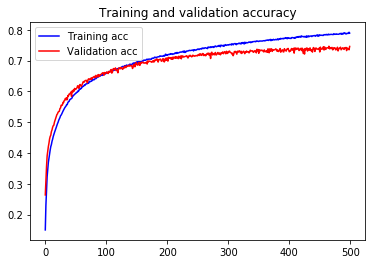

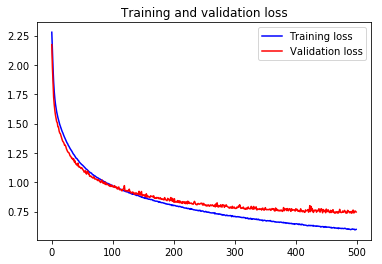

In [16]:
# Let's take a look at the loss and accuracy curves during training:
import matplotlib.pyplot as plt
import keras

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'B', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'B', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model1.save('vgg_simplified.h5')

In [25]:
from keras.models import load_model
model_simplifiedVGG16 = load_model('vgg_simplified.h5')
loss11, accuracy11 = model_simplifiedVGG16.evaluate(x_train, y_train, verbose=0)
print("For simplified VGG16, training accuracy is %.2f %%     loss = %f" % (accuracy11 * 100, loss11))
loss12, accuracy12 = model_simplifiedVGG16.evaluate(x_test, y_test, verbose=0)
print("For simplified VGG16, testing accuracy is %.2f %%    loss = %f" % (accuracy12 * 100, loss12))

For simplified VGG16, training accuracy is 84.52 %     loss = 0.462542
For simplified VGG16, testing accuracy is 74.60 %    loss = 0.746792


# The 2nd model: 
Adjusts the more abstract representations of pre-trained VGG16.

weights = None, 

include_top = False,

In [26]:
# Have a look at the performance of VGG16 model(no-pretraining on ImageNet)
# Fine tuning on pre-trained VGG16 model
# Adjusts the more abstract representations of pre-trained VGG16
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights=None, include_top=False, 
             input_shape=x_train.shape[1:], classes=10)
x = base_model.get_layer('block3_pool').output
x = Flatten(name='flatten')(x)
x = Dense(512, activation='relu', name='fc1')(x)
predictions = Dense(nb_classes, activation='softmax')(x)
vgg_16 = Model(input=base_model.input, output=predictions)
vgg_16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
vgg_16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'vgg_16.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

In [29]:
history_vgg16 = vgg_16.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 349us/step - loss: 1.6671 - acc: 0.3783 - val_loss: 1.2688 - val_acc: 0.5436
Epoch 2/100
50000/50000 [==============================] - 16s 316us/step - loss: 1.0972 - acc: 0.6100 - val_loss: 1.0001 - val_acc: 0.6445
Epoch 3/100
50000/50000 [==============================] - 16s 318us/step - loss: 0.8578 - acc: 0.6959 - val_loss: 0.8265 - val_acc: 0.7121
Epoch 4/100
50000/50000 [==============================] - 16s 326us/step - loss: 0.7100 - acc: 0.7492 - val_loss: 0.7832 - val_acc: 0.7293
Epoch 5/100
50000/50000 [==============================] - 16s 321us/step - loss: 0.5943 - acc: 0.7907 - val_loss: 0.7563 - val_acc: 0.7415
Epoch 6/100
50000/50000 [==============================] - 16s 316us/step - loss: 0.5034 - acc: 0.8233 - val_loss: 0.7276 - val_acc: 0.7622
Epoch 7/100
50000/50000 [==============================] - 16s 316us/step - loss: 0.4186 - acc: 0.8523 - val_l

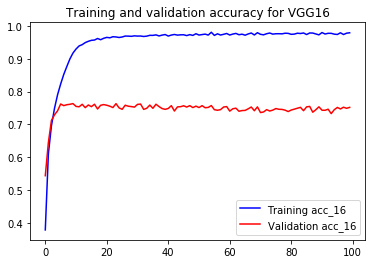

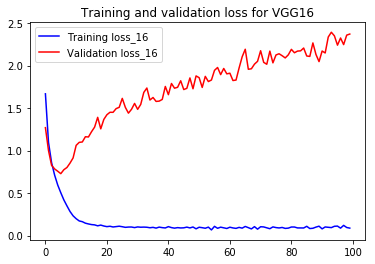

In [30]:
acc_16 = history_vgg16.history['acc']
val_acc_16 = history_vgg16.history['val_acc']
loss_16 = history_vgg16.history['loss']
val_loss_16 = history_vgg16.history['val_loss']

epochs = range(len(acc_16))

plt.plot(epochs, acc_16, 'B', label='Training acc_16')
plt.plot(epochs, val_acc_16, 'r', label='Validation acc_16')
plt.title('Training and validation accuracy for VGG16')
plt.legend()

plt.figure()

plt.plot(epochs, loss_16, 'B', label='Training loss_16')
plt.plot(epochs, val_loss_16, 'r', label='Validation loss_16')
plt.title('Training and validation loss for VGG16')
plt.legend()
plt.show()

In [0]:
vgg_16.save('vgg_trained.h5')

In [0]:
model_VGG16 = load_model('vgg_trained.h5')

In [33]:
loss21, accuracy21 = model_VGG16.evaluate(x_train, y_train, verbose=0)
print("For VGG16, training accuracy is %.2f %%     loss = %f" % (accuracy21 * 100, loss21))
loss22, accuracy22 = model_VGG16.evaluate(x_test, y_test, verbose=0)
print("For VGG16, testing accuracy is %.2f %%    loss = %f" % (accuracy22 * 100, loss22))


For VGG16, training accuracy is 98.76 %     loss = 0.050896
For VGG16, testing accuracy is 75.19 %    loss = 2.370067


# The 3rd model:
Modify the 2nd model:
remove final dense(512) layer

In [57]:
x = Input(shape=(img_rows, img_cols, channels))
y = x
y = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)

y = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='same')(y)

y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(units=nb_classes, activation='softmax', kernel_initializer='he_normal')(y)

vgg_16_modified = Model(inputs=x, outputs=y, name='model1')

vgg_16_modified.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
vgg_16_modified.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
__________

In [0]:
vgg_16_modified.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
checkpoint = ModelCheckpoint(
    'vgg_16_modified.h5', 
    monitor='val_acc', 
    verbose=0, 
    save_best_only=True, 
    save_weights_only=False,
    mode='auto'
)

In [61]:
history_vgg_16_modified = vgg_16_modified.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 269us/step - loss: 1.2398 - acc: 0.5546 - val_loss: 0.9342 - val_acc: 0.6748
Epoch 2/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.8449 - acc: 0.7039 - val_loss: 0.7429 - val_acc: 0.7451
Epoch 3/100
50000/50000 [==============================] - 14s 271us/step - loss: 0.6744 - acc: 0.7649 - val_loss: 0.7591 - val_acc: 0.7484
Epoch 4/100
50000/50000 [==============================] - 13s 267us/step - loss: 0.5645 - acc: 0.8037 - val_loss: 0.6452 - val_acc: 0.7773
Epoch 5/100
50000/50000 [==============================] - 13s 265us/step - loss: 0.4787 - acc: 0.8321 - val_loss: 0.6215 - val_acc: 0.7954
Epoch 6/100
50000/50000 [==============================] - 13s 265us/step - loss: 0.4107 - acc: 0.8553 - val_loss: 0.6037 - val_acc: 0.7991
Epoch 7/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.3519 - acc: 0.8763 - val_l

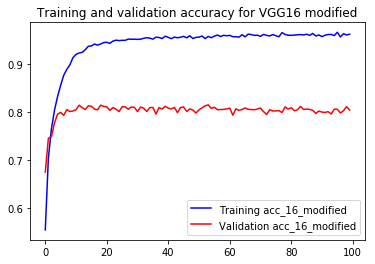

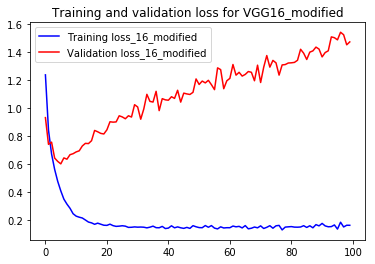

In [62]:
acc_16 = history_vgg_16_modified.history['acc']
val_acc_16 = history_vgg_16_modified.history['val_acc']
loss_16 = history_vgg_16_modified.history['loss']
val_loss_16 = history_vgg_16_modified.history['val_loss']

epochs = range(len(acc_16))

plt.plot(epochs, acc_16, 'B', label='Training acc_16_modified')
plt.plot(epochs, val_acc_16, 'r', label='Validation acc_16_modified')
plt.title('Training and validation accuracy for VGG16 modified')
plt.legend()

plt.figure()

plt.plot(epochs, loss_16, 'B', label='Training loss_16_modified')
plt.plot(epochs, val_loss_16, 'r', label='Validation loss_16_modified')
plt.title('Training and validation loss for VGG16_modified')
plt.legend()
plt.show()

In [0]:
vgg_16_modified.save('vgg_modified.h5')

In [0]:
model_VGG16_modified = load_model('vgg_modified.h5')

In [65]:
loss31, accuracy31 = model_VGG16_modified.evaluate(x_train, y_train, verbose=0)
print("For VGG16_modified, training accuracy is %.2f %%     loss = %f" % (accuracy31 * 100, loss31))
loss32, accuracy32 = model_VGG16_modified.evaluate(x_test, y_test, verbose=0)
print("For VGG16_modified, testing accuracy is %.2f %%    loss = %f" % (accuracy32 * 100, loss32))


For VGG16_modified, training accuracy is 98.69 %     loss = 0.043296
For VGG16_modified, testing accuracy is 80.37 %    loss = 1.475300


# Whether Data Augmentation helps?

Visualize few images with Data Aug

In [0]:
datagen = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.05,
      height_shift_range=0.05,
      shear_range=0.05,
      zoom_range=0.05,
      horizontal_flip=True,
      fill_mode='nearest')

In [0]:
from keras.preprocessing import image
# have a look at the generated images for the first training image
triv = x_train[666]
triv = triv.reshape((1,) + triv.shape)

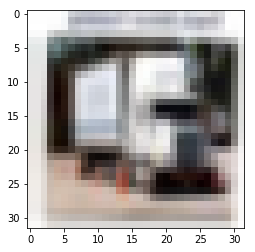

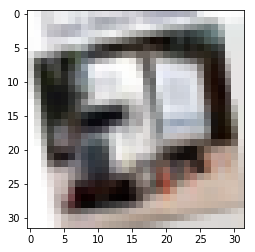

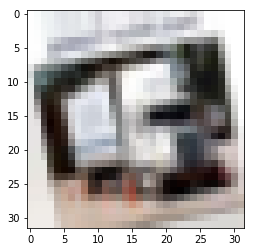

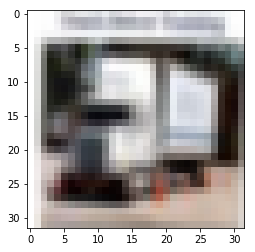

In [74]:
i = 0
for batch in datagen.flow(triv, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [0]:
datagen.fit(x_train)

In [0]:
generate = datagen.flow(x_train, y_train, batch_size=64)

#  1st model + Data Aug

In [77]:
history_1st_gen = model1.fit_generator(generator=generate, steps_per_epoch=50000//64, epochs=100, validation_data=(x_test, y_test))
model1.save('vgg_simplified_data_augmentation.h5')

Epoch 1/100
781/781 [==============================] - 23s 29ms/step - loss: 0.8681 - acc: 0.6967 - val_loss: 0.7823 - val_acc: 0.7289
Epoch 2/100
781/781 [==============================] - 23s 29ms/step - loss: 0.8539 - acc: 0.7007 - val_loss: 0.8434 - val_acc: 0.7154
Epoch 3/100
781/781 [==============================] - 24s 31ms/step - loss: 0.8532 - acc: 0.7001 - val_loss: 0.8224 - val_acc: 0.7169
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 0.8492 - acc: 0.7041 - val_loss: 0.7962 - val_acc: 0.7274
Epoch 5/100
781/781 [==============================] - 23s 29ms/step - loss: 0.8492 - acc: 0.7024 - val_loss: 0.7917 - val_acc: 0.7255
Epoch 6/100
781/781 [==============================] - 24s 30ms/step - loss: 0.8489 - acc: 0.7009 - val_loss: 0.8040 - val_acc: 0.7240
Epoch 7/100
781/781 [==============================] - 24s 30ms/step - loss: 0.8411 - acc: 0.7077 - val_loss: 0.8117 - val_acc: 0.7207
Epoch 8/100
781/781 [==============================] - 

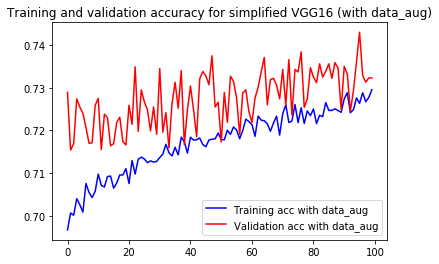

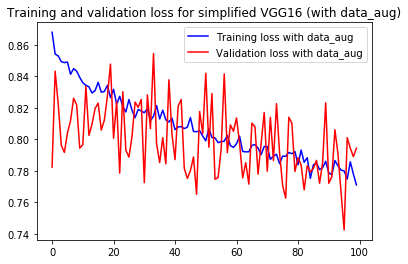

In [78]:
acc_data_augmentation = history_1st_gen.history['acc']
val_acc_data_augmentation = history_1st_gen.history['val_acc']
loss_data_augmentation = history_1st_gen.history['loss']
val_loss_data_augmentation = history_1st_gen.history['val_loss']

epochs = range(len(acc_data_augmentation))

plt.plot(epochs, acc_data_augmentation, 'B', label='Training acc with data_aug')
plt.plot(epochs, val_acc_data_augmentation, 'r', label='Validation acc with data_aug')
plt.title('Training and validation accuracy for simplified VGG16 (with data_aug)')
plt.legend()

plt.figure()

plt.plot(epochs, loss_data_augmentation, 'B', label='Training loss with data_aug')
plt.plot(epochs, val_loss_data_augmentation, 'r', label='Validation loss with data_aug')
plt.title('Training and validation loss for simplified VGG16 (with data_aug)')
plt.legend()
plt.show()

In [0]:
vgg_simplified_data_augmentation = load_model('vgg_simplified_data_augmentation.h5')

In [80]:
loss41, accuracy41 = vgg_simplified_data_augmentation.evaluate(x_train, y_train, verbose=0)
print("For simplified VGG16 with data augmentation, training accuracy is %.2f %%     loss = %f" % (accuracy41 * 100, loss41))
loss42, accuracy42 = vgg_simplified_data_augmentation.evaluate(x_test, y_test, verbose=0)
print("For simplified VGG16 with data augmentation, testing accuracy is %.2f %%    loss = %f" % (accuracy42 * 100, loss42))

For simplified VGG16 with data augmentation, training accuracy is 77.88 %     loss = 0.633512
For simplified VGG16 with data augmentation, testing accuracy is 73.23 %    loss = 0.794326


#  2nd model + Data Aug

In [81]:
history_2nd_gen = vgg_16.fit_generator(generator=generate, steps_per_epoch=50000//64, epochs=100, validation_data=(x_test, y_test))
vgg_16.save('vgg16_data_augmentation.h5')

Epoch 1/100
781/781 [==============================] - 28s 35ms/step - loss: 0.8497 - acc: 0.7460 - val_loss: 0.8881 - val_acc: 0.7314
Epoch 2/100
781/781 [==============================] - 27s 34ms/step - loss: 0.6716 - acc: 0.7808 - val_loss: 0.8473 - val_acc: 0.7479
Epoch 3/100
781/781 [==============================] - 26s 33ms/step - loss: 0.6149 - acc: 0.7967 - val_loss: 0.8626 - val_acc: 0.7470
Epoch 4/100
781/781 [==============================] - 28s 35ms/step - loss: 0.5991 - acc: 0.8011 - val_loss: 0.8211 - val_acc: 0.7548
Epoch 5/100
781/781 [==============================] - 26s 33ms/step - loss: 0.5706 - acc: 0.8103 - val_loss: 0.7926 - val_acc: 0.7586
Epoch 6/100
781/781 [==============================] - 26s 33ms/step - loss: 0.5521 - acc: 0.8160 - val_loss: 0.7334 - val_acc: 0.7750
Epoch 7/100
781/781 [==============================] - 29s 37ms/step - loss: 0.5358 - acc: 0.8189 - val_loss: 0.8186 - val_acc: 0.7580
Epoch 8/100
781/781 [==============================] - 

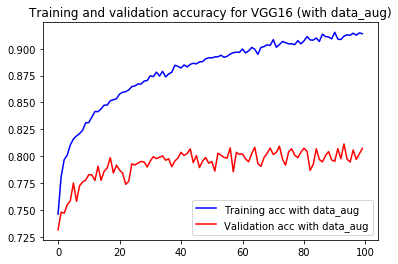

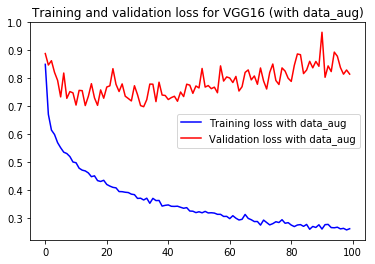

In [82]:
acc_data_augmentation = history_2nd_gen.history['acc']
val_acc_data_augmentation = history_2nd_gen.history['val_acc']
loss_data_augmentation = history_2nd_gen.history['loss']
val_loss_data_augmentation = history_2nd_gen.history['val_loss']

epochs = range(len(acc_data_augmentation))

plt.plot(epochs, acc_data_augmentation, 'B', label='Training acc with data_aug')
plt.plot(epochs, val_acc_data_augmentation, 'r', label='Validation acc with data_aug')
plt.title('Training and validation accuracy for VGG16 (with data_aug)')
plt.legend()

plt.figure()

plt.plot(epochs, loss_data_augmentation, 'B', label='Training loss with data_aug')
plt.plot(epochs, val_loss_data_augmentation, 'r', label='Validation loss with data_aug')
plt.title('Training and validation loss for VGG16 (with data_aug)')
plt.legend()
plt.show()

In [0]:
vgg_16_data_augmentation = load_model('vgg16_data_augmentation.h5')

In [84]:
loss51, accuracy51 = vgg_16_data_augmentation.evaluate(x_train, y_train, verbose=0)
print("For VGG16 with data augmentation, training accuracy is %.2f %%     loss = %f" % (accuracy51 * 100, loss51))
loss52, accuracy52 = vgg_16_data_augmentation.evaluate(x_test, y_test, verbose=0)
print("For VGG16 with data augmentation, testing accuracy is %.2f %%    loss = %f" % (accuracy52 * 100, loss52))

For VGG16 with data augmentation, training accuracy is 95.01 %     loss = 0.155336
For VGG16 with data augmentation, testing accuracy is 80.73 %    loss = 0.814771


#  3rd model + Data Aug

In [85]:
history_3rd_gen = vgg_16_modified.fit_generator(generator=generate, steps_per_epoch=50000//64, epochs=100, validation_data=(x_test, y_test))
vgg_16_modified.save('vgg16_modified_data_augmentation.h5')

Epoch 1/100
781/781 [==============================] - 26s 33ms/step - loss: 0.8941 - acc: 0.7314 - val_loss: 0.7862 - val_acc: 0.7599
Epoch 2/100
781/781 [==============================] - 25s 33ms/step - loss: 0.7326 - acc: 0.7593 - val_loss: 0.8243 - val_acc: 0.7573
Epoch 3/100
781/781 [==============================] - 25s 32ms/step - loss: 0.7064 - acc: 0.7679 - val_loss: 0.7951 - val_acc: 0.7690
Epoch 4/100
781/781 [==============================] - 26s 34ms/step - loss: 0.6780 - acc: 0.7749 - val_loss: 0.7384 - val_acc: 0.7774
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 0.6536 - acc: 0.7830 - val_loss: 0.6736 - val_acc: 0.7939
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 0.6426 - acc: 0.7848 - val_loss: 0.6789 - val_acc: 0.7963
Epoch 7/100
781/781 [==============================] - 26s 34ms/step - loss: 0.6280 - acc: 0.7904 - val_loss: 0.7053 - val_acc: 0.7798
Epoch 8/100
781/781 [==============================] - 

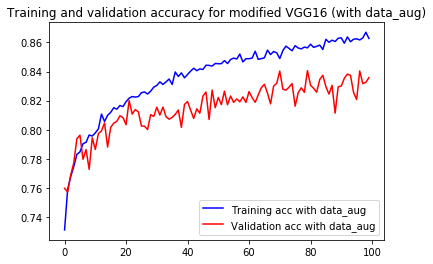

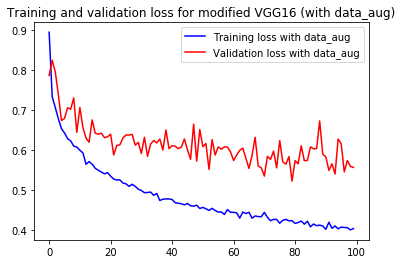

In [86]:
acc_data_augmentation = history_3rd_gen.history['acc']
val_acc_data_augmentation = history_3rd_gen.history['val_acc']
loss_data_augmentation = history_3rd_gen.history['loss']
val_loss_data_augmentation = history_3rd_gen.history['val_loss']

epochs = range(len(acc_data_augmentation))

plt.plot(epochs, acc_data_augmentation, 'B', label='Training acc with data_aug')
plt.plot(epochs, val_acc_data_augmentation, 'r', label='Validation acc with data_aug')
plt.title('Training and validation accuracy for modified VGG16 (with data_aug)')
plt.legend()

plt.figure()

plt.plot(epochs, loss_data_augmentation, 'B', label='Training loss with data_aug')
plt.plot(epochs, val_loss_data_augmentation, 'r', label='Validation loss with data_aug')
plt.title('Training and validation loss for modified VGG16 (with data_aug)')
plt.legend()
plt.show()

In [0]:
vgg_16_data_augmentation = load_model('vgg16_data_augmentation.h5')

In [88]:
loss51, accuracy51 = vgg_16_data_augmentation.evaluate(x_train, y_train, verbose=0)
print("For VGG16 with data augmentation, training accuracy is %.2f %%     loss = %f" % (accuracy51 * 100, loss51))
loss52, accuracy52 = vgg_16_data_augmentation.evaluate(x_test, y_test, verbose=0)
print("For VGG16 with data augmentation, testing accuracy is %.2f %%    loss = %f" % (accuracy52 * 100, loss52))

For VGG16 with data augmentation, training accuracy is 95.01 %     loss = 0.155336
For VGG16 with data augmentation, testing accuracy is 80.73 %    loss = 0.814771


# Models Structure

In [0]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

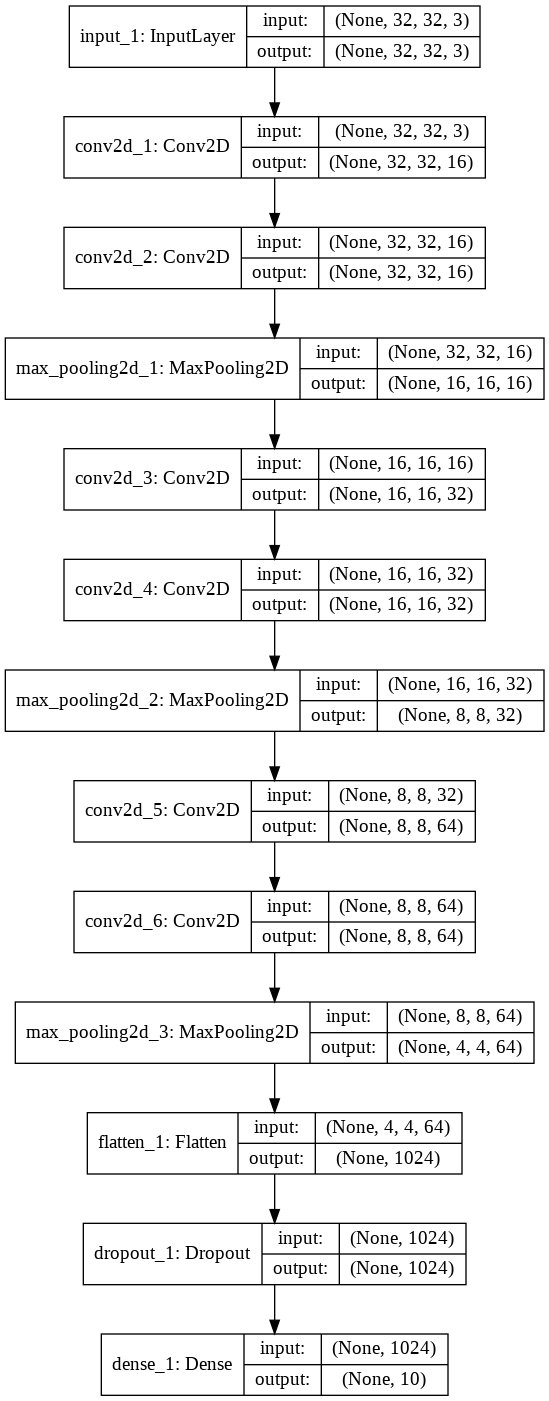

In [90]:
plot_model(model1,to_file='model1.png',show_shapes=True, show_layer_names=True)

Image(retina=True, filename='model1.png')

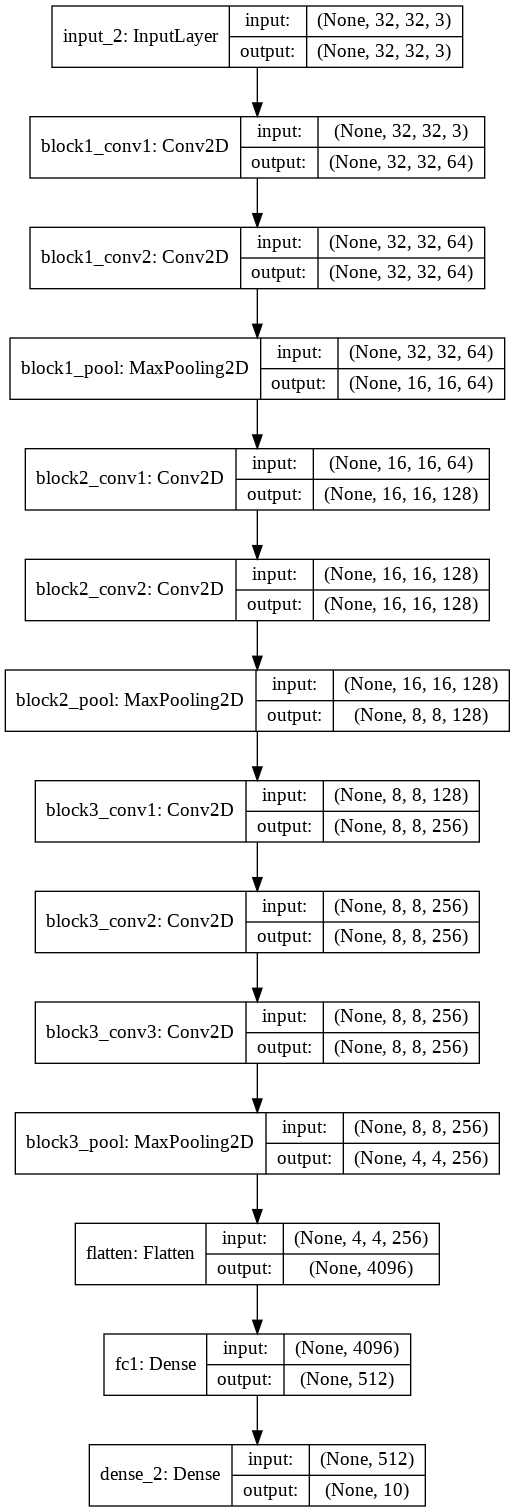

In [91]:
plot_model(vgg_16,to_file='model2.png',show_shapes=True, show_layer_names=True)

Image(retina=True, filename='model2.png')

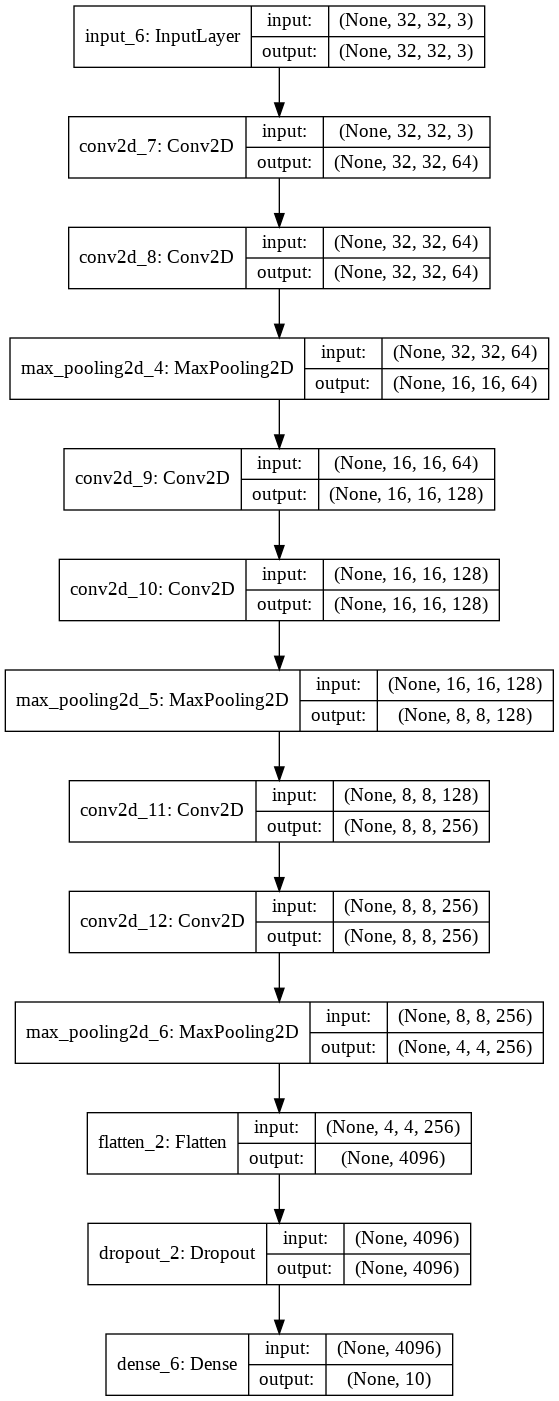

In [92]:
plot_model(vgg_16_modified,to_file='model3.png',show_shapes=True, show_layer_names=True)

Image(retina=True, filename='model3.png')